In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head()import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [6]:
# checking out the -ve comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
# checking out the +ve comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: >

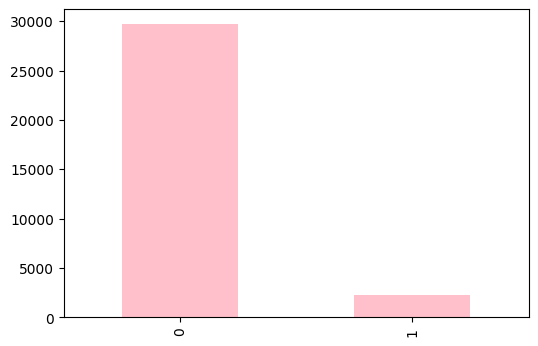

In [8]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

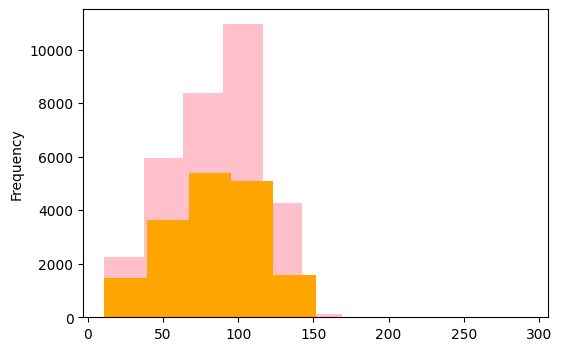

In [9]:

# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [10]:
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()
train.head(10)


,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [11]:

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

C:\Users\hemen\AppData\Local\Temp\ipykernel_33892\3421818104.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)


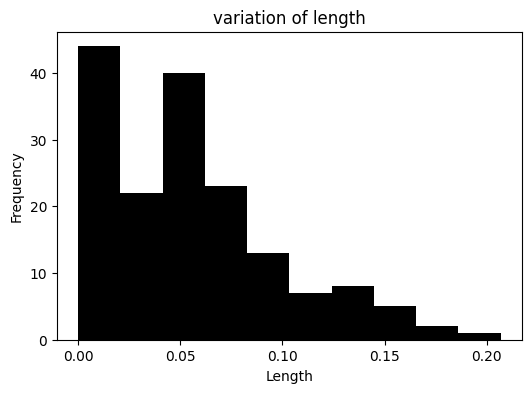

In [12]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

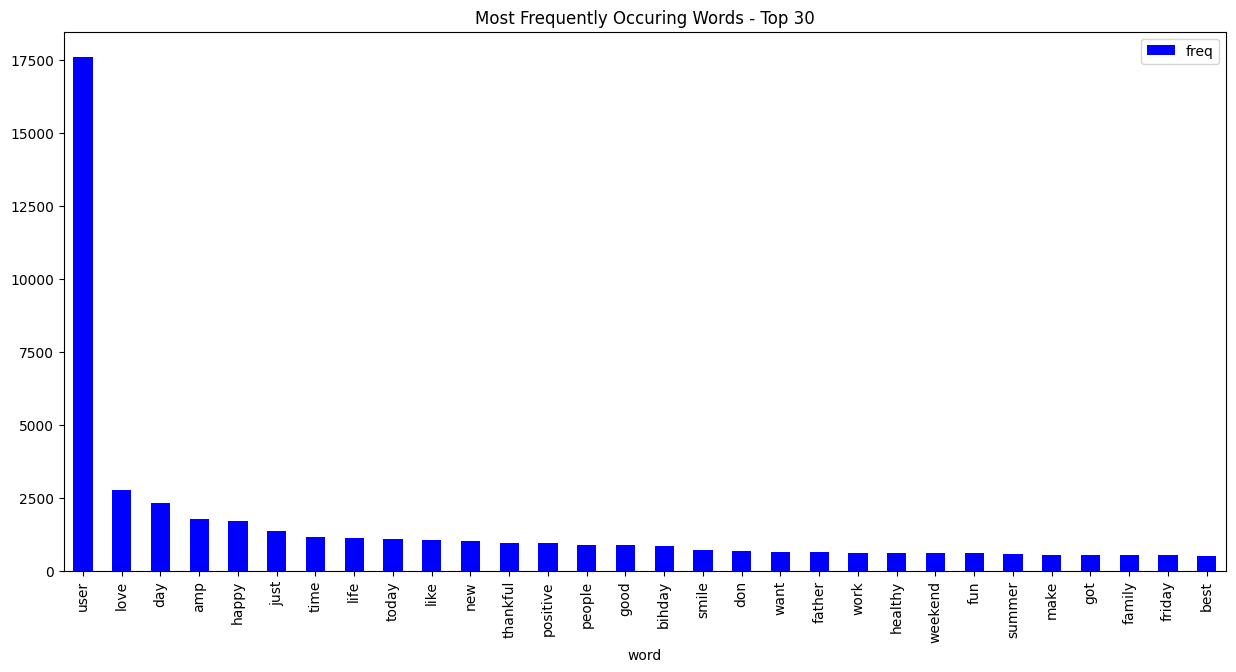

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

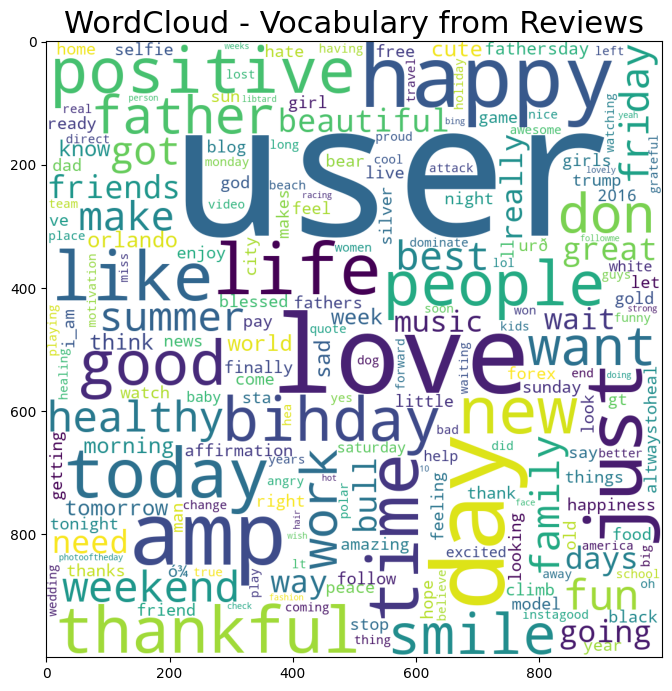

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

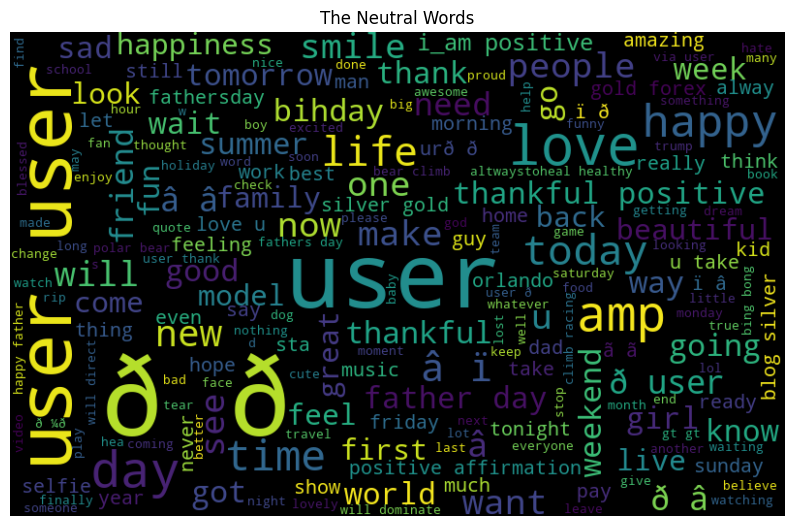

In [16]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

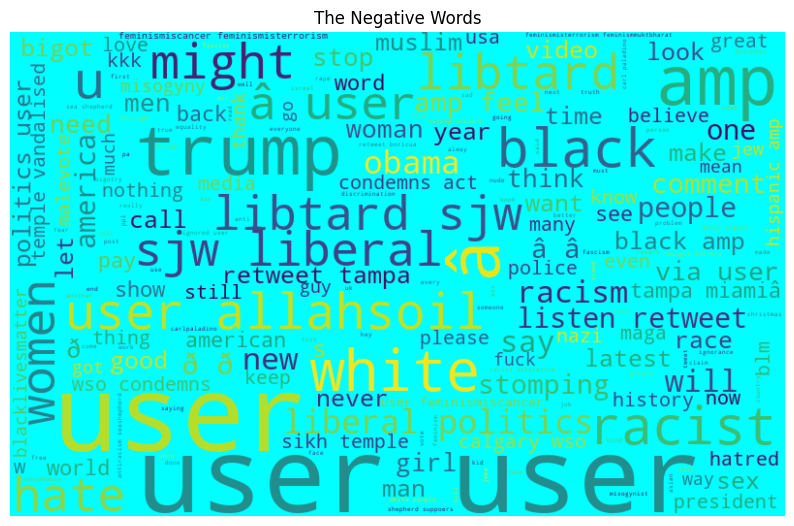

In [17]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [18]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [19]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [20]:
pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


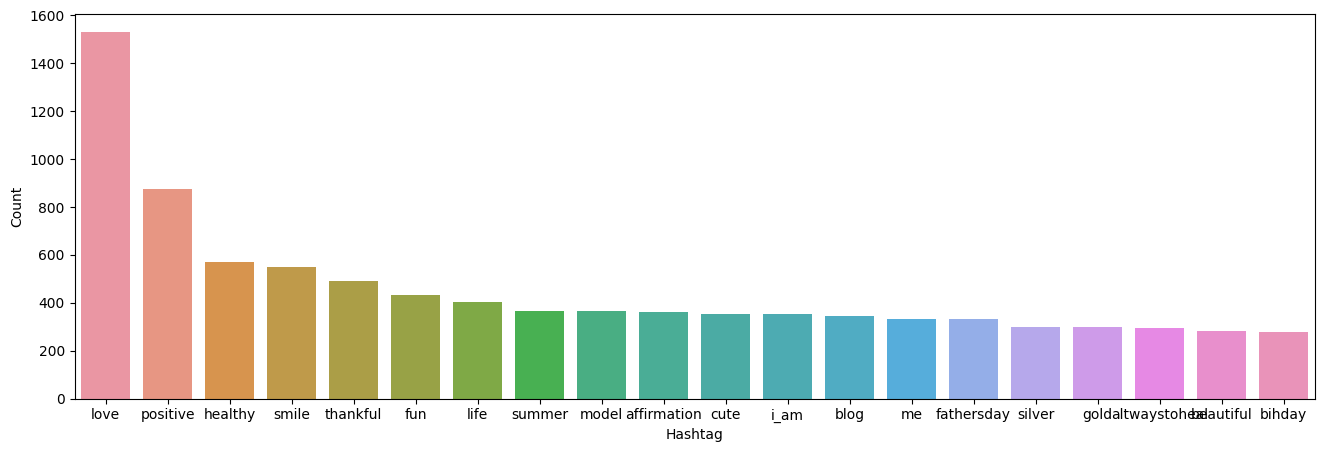

In [21]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

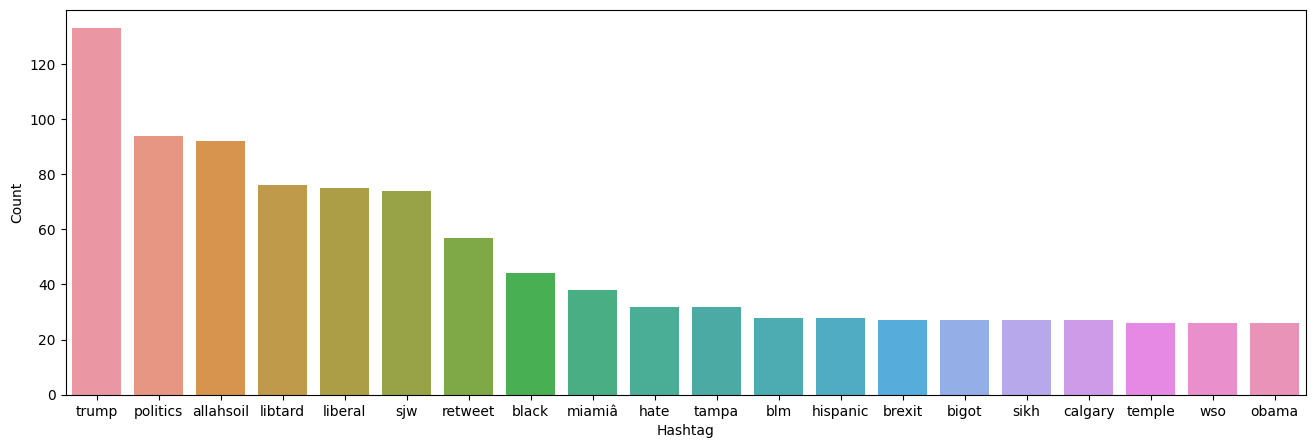

In [22]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [23]:
# Tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# Importing gensim
import gensim

# Creating a word to vector model
model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,  
    window=5,         
    min_count=2,     
    sg=1,             
    hs=0,            
    negative=10,      
    workers=2,        
    seed=34           
)

# Training the Word2Vec model
model_w2v.train(tokenized_tweet, total_examples=len(train['tweet']), epochs=20)


(6109793, 8411580)

In [24]:
model_w2v.wv.most_similar(positive = "dinner")
#ans

[('spaghetti', 0.6673206686973572),
 ('#prosecco', 0.619572103023529),
 ('#wanderlust', 0.6054769158363342),
 ('fluffy', 0.5980618000030518),
 ('#deutschland', 0.5851767659187317),
 ('7!', 0.5846244096755981),
 ('#restaurant', 0.5837711691856384),
 ('#boardgames', 0.5804104804992676),
 ('podium', 0.5782974362373352),
 ('coaching', 0.5772541761398315)]

In [25]:
model_w2v.wv.most_similar(positive = "cancer")
#ans

[('champion,', 0.7067955136299133),
 ('level.', 0.6931005120277405),
 ('ways.', 0.6916317343711853),
 ('ownership', 0.6875662803649902),
 ('#merica', 0.6874704360961914),
 ('tolerance', 0.6862422227859497),
 ('intelligent', 0.6855042576789856),
 ('spots.', 0.6823567748069763),
 ('aol', 0.6809021234512329),
 ('moto', 0.6796425580978394)]

In [26]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7109655141830444),
 ('"mytraining"', 0.7067878246307373),
 ('training"', 0.6871899962425232),
 ('app,', 0.6419712901115417),
 ('"my', 0.6065344214439392),
 ('app', 0.5961790680885315),
 ('heroku', 0.5796176791191101),
 ('bees', 0.5763747692108154),
 ("domino's", 0.5679916143417358),
 ('ta', 0.5679757595062256)]

In [27]:

model_w2v.wv.most_similar(negative = "hate")

[('#staup', 0.019480520859360695),
 ('â\x9c\x88ï¸\x8f', 0.01544550247490406),
 ('#css', 0.0022245391737669706),
 ('#foodie', 0.002057225676253438),
 ('street,', -0.00018518399156164378),
 ('#ireland', -0.0054956115782260895),
 ('de', -0.0063438499346375465),
 ('#crafts', -0.008619395084679127),
 ('yay!', -0.00870032049715519),
 ('ð\x9f\x8d»', -0.009558682329952717)]

In [28]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tqdm in c:\users\hemen\appdata\local\programs\python\python310\lib\site-packages (4.66.4)




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))
    return output

# Label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]


[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [30]:
from gensim.models.doc2vec import TaggedDocument

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# Assuming tokenized_tweet is a pandas Series or a list of lists
# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]


[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [31]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hemen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [33]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [34]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [35]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [36]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [37]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

# Assuming x and y are your feature matrix and target vector respectively
# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Predicting on validation set
y_pred = model.predict(x_valid)

# Printing accuracy scores
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# Calculating F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 score :", f1)

# Generating confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)


Training Accuracy : 0.9991004732293011
Validation Accuracy : 0.9540122008446739
F1 score : 0.6352357320099256
Confusion Matrix:
[[5843   94]
 [ 200  256]]


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

# Assuming x and y are your feature matrix and target vector respectively
# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing LogisticRegression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predicting on validation set
y_pred = model.predict(x_valid)

# Printing accuracy scores
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# Calculating F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 score :", f1)

# Generating confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)


C:\Users\hemen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9675388165356487
Validation Accuracy : 0.9536993586735492
F1 score : 0.6032171581769438
Confusion Matrix:
[[5872   65]
 [ 231  225]]


In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991004732293011
Validation Accuracy : 0.9319568277803848
f1 score : 0.5529290853031861
[[5689  248]
 [ 187  269]]


In [41]:
# Assuming x_test is your preprocessed test data after vectorization and scaling

# Predicting on the test set
y_pred_test = model.predict(x_test)

# Mapping labels to sentiments
sentiment_map = {0: "Negative", 1: "Positive"}

# Printing the sentiments of the test set
for i, sentiment_id in enumerate(y_pred_test):
    print(f"Tweet {i+1}: {sentiment_map[sentiment_id]}")


Tweet 1: Negative
Tweet 2: Positive
Tweet 3: Negative
Tweet 4: Negative
Tweet 5: Positive
Tweet 6: Negative
Tweet 7: Negative
Tweet 8: Negative
Tweet 9: Negative
Tweet 10: Negative
Tweet 11: Negative
Tweet 12: Negative
Tweet 13: Negative
Tweet 14: Negative
Tweet 15: Negative
Tweet 16: Negative
Tweet 17: Negative
Tweet 18: Negative
Tweet 19: Negative
Tweet 20: Negative
Tweet 21: Negative
Tweet 22: Negative
Tweet 23: Negative
Tweet 24: Negative
Tweet 25: Negative
Tweet 26: Negative
Tweet 27: Negative
Tweet 28: Negative
Tweet 29: Negative
Tweet 30: Negative
Tweet 31: Negative
Tweet 32: Negative
Tweet 33: Negative
Tweet 34: Negative
Tweet 35: Negative
Tweet 36: Negative
Tweet 37: Negative
Tweet 38: Negative
Tweet 39: Negative
Tweet 40: Negative
Tweet 41: Positive
Tweet 42: Negative
Tweet 43: Negative
Tweet 44: Negative
Tweet 45: Negative
Tweet 46: Negative
Tweet 47: Negative
Tweet 48: Negative
Tweet 49: Negative
Tweet 50: Negative
Tweet 51: Negative
Tweet 52: Negative
Tweet 53: Negative
Tw

In [42]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9737963940709453
Validation Accuracy : 0.9535429375879868
f1 score : 0.5409582689335395
[[5921   16]
 [ 281  175]]


In [43]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9608510305448004
Validation Accuracy : 0.9533865165024246
f1 score : 0.5655976676384838
[[5901   36]
 [ 262  194]]


In [54]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'model' is your trained model and 'cv' is your CountVectorizer used in training
def classify_sentiment(text, model, cv):
    # Preprocess the input text
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    
    # Vectorize the preprocessed text
    input_features = cv.transform([review]).toarray()
    
    # Standardize the input features (if needed)
    sc = StandardScaler()
    input_features = sc.fit_transform(input_features)
    
    # Predict the sentiment
    prediction = model.predict(input_features)
    
    # Return the sentiment label
    if prediction == 0:
        return "Negative"
    elif prediction =
    = 1:
        return "Positive"
    else:
        return "Neutral"  # Adjust this if your model has a neutral category

# Example usage:
input_text = "i dislike apple"
predicted_sentiment = classify_sentiment(input_text, model, cv)
print(f"The sentiment of '{input_text}' is {predicted_sentiment}.")


The sentiment of 'i dislike apple' is Negative.


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Assuming x_train, x_valid, y_train, y_valid are already defined

# Train Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict probabilities on validation set
y_pred_probs = model.predict_proba(x_valid)[:, 1]  # Probabilities of positive class

# Define a new threshold (adjust as needed)
new_threshold = 0.3

# Adjust predictions based on new threshold
y_pred = (y_pred_probs >= new_threshold).astype(int)

# Evaluate performance
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
conf_mat = confusion_matrix(y_valid, y_pred)

print(f"Validation Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_mat}")


Validation Accuracy: 0.9529172532457375
F1 Score: 0.6528258362168398
Confusion Matrix:
[[5809  128]
 [ 173  283]]


C:\Users\hemen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:

# Assuming 'model' is your trained model and 'cv' is your CountVectorizer used in training
def classify_sentiment(text, model, cv):
    # Preprocess the input text
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    
    # Vectorize the preprocessed text
    input_features = cv.transform([review]).toarray()
    
    # Standardize the input features (if needed)
    sc = StandardScaler()
    input_features = sc.fit_transform(input_features)
    
    # Predict the sentiment
    prediction = model.predict(input_features)
    
    # Return the sentiment label
    if prediction == 0:
        return "Negative"
    elif prediction == 1:
        return "Positive"
    else:
        return "Neutral"  # Adjust this if your model has a neutral category

# Example usage:
input_text = "1"
predicted_sentiment = classify_sentiment(input_text, model, cv)
print(f"The sentiment of '{input_text}' is {predicted_sentiment}.")

The sentiment of '1' is Negative.
